# Hr_Employee Attrition

The HR Employee Attrition dataset is being mustered up by the IBM Data scientist involving several factors of employee. Though the data is fictious but since the data is used by data scientists of a reputed company it can be considered for an exploratory study. 

The dataset was fully obtained from the Kaggle website: https://www.kaggle.com/datasets/patelprashant/employee-attrition. It consists information of 1470 employees with their 35 Characteristics including their Attrition status as a dependent variable where the attrition rate in the organization appears to be 20%. 

# Importing Libraries 

In [1]:
# importing libraries for Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import plotly.express as px
import matplotlib.lines as mlines

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
import sklearn.neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')


# Exploratory Data Anaylsis (EDA)

This section show the data preparation and pre-processing ready for exploratory analysis

In [3]:
#using the pandas datafram to read the raw dataset
df = pd.read_csv("C:\\Users\\B1360062\\OneDrive - Teesside University\\Semester 2\\Machine Learning\\Assessment\\To Submit\\Employee_Attrition.csv")

In [4]:
# Printing out the first 5 rows of the dataframe
print(df)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [5]:
#Checking the Dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Printing the first 6 rows of the dataset
df.head(6)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  

[6 rows x 35 columns]

In [7]:
#Total number rows and columns in the raw dataset
df.shape

(1470, 35)

In [8]:
#Get a count of empty values in each columns
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
#Check for any missing or null values in the data
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [10]:
# finding the mean, standard deviation, min, max, count, avg and percentile details of each column
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [11]:
#Analysing the targeted variable
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
#Get a count of the number of employees that stayed and left the company
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

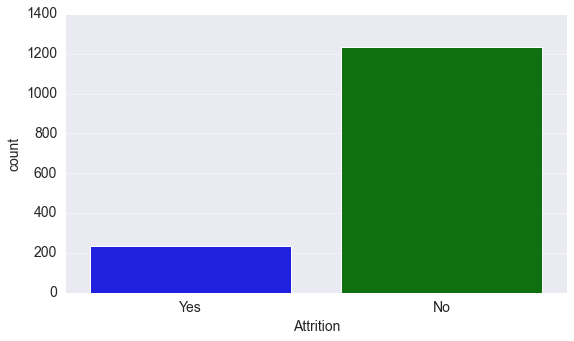

In [13]:
#visual of the number of employees that stayed and left the company
sns.countplot(df['Attrition'])

In [14]:
#check if we guess the NO attrition percentage
(1233 - 237)/1233

0.8077858880778589

In [15]:
#Checking the columns variables in the data
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
#print all the data types and unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("--------------------------------------------")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
--------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
--------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
--------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
--------------------------------------------
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
---------

In [17]:
#Dropping unneccessary columns which contains same and unwanted rows values 
df = df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18','PerformanceRating'], axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Data Visualization

This section tends to show the relationships factored to influence employee attrition in an organization based on the dataset attained.

major factors o consider are; the employees age, monthly income, job level, marital status, job satisfaction, number of companies worked with, overtime, work life balance, relationship satisfaction, job role, daily rate and percentage hike. Below are the result and observations obtained.

In [18]:
#Checking the percentage count of employees in each department; Research&Development, Sales and Human Resources
type_Department = df["Department"].value_counts()
Department = type_Department.index
quantity = type_Department.values

fig = px.pie(df,
            values = quantity,
            names = Department,
            hole = 0.3,
            title = "Employee's Department")
fig.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

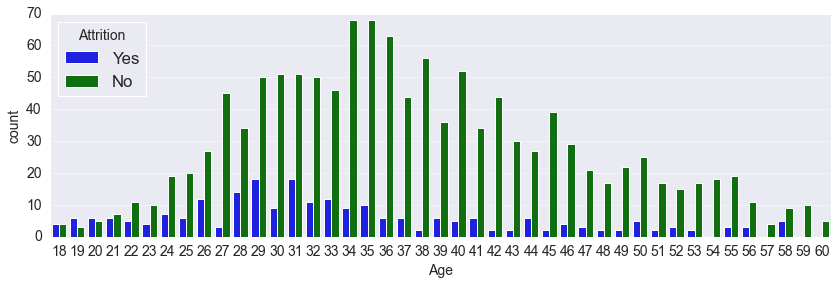

In [22]:
#Show number of employees that has stayed and left the company by Age
plt.subplots(figsize=(14,4))
sns.countplot(x='Age', hue='Attrition', data=df)

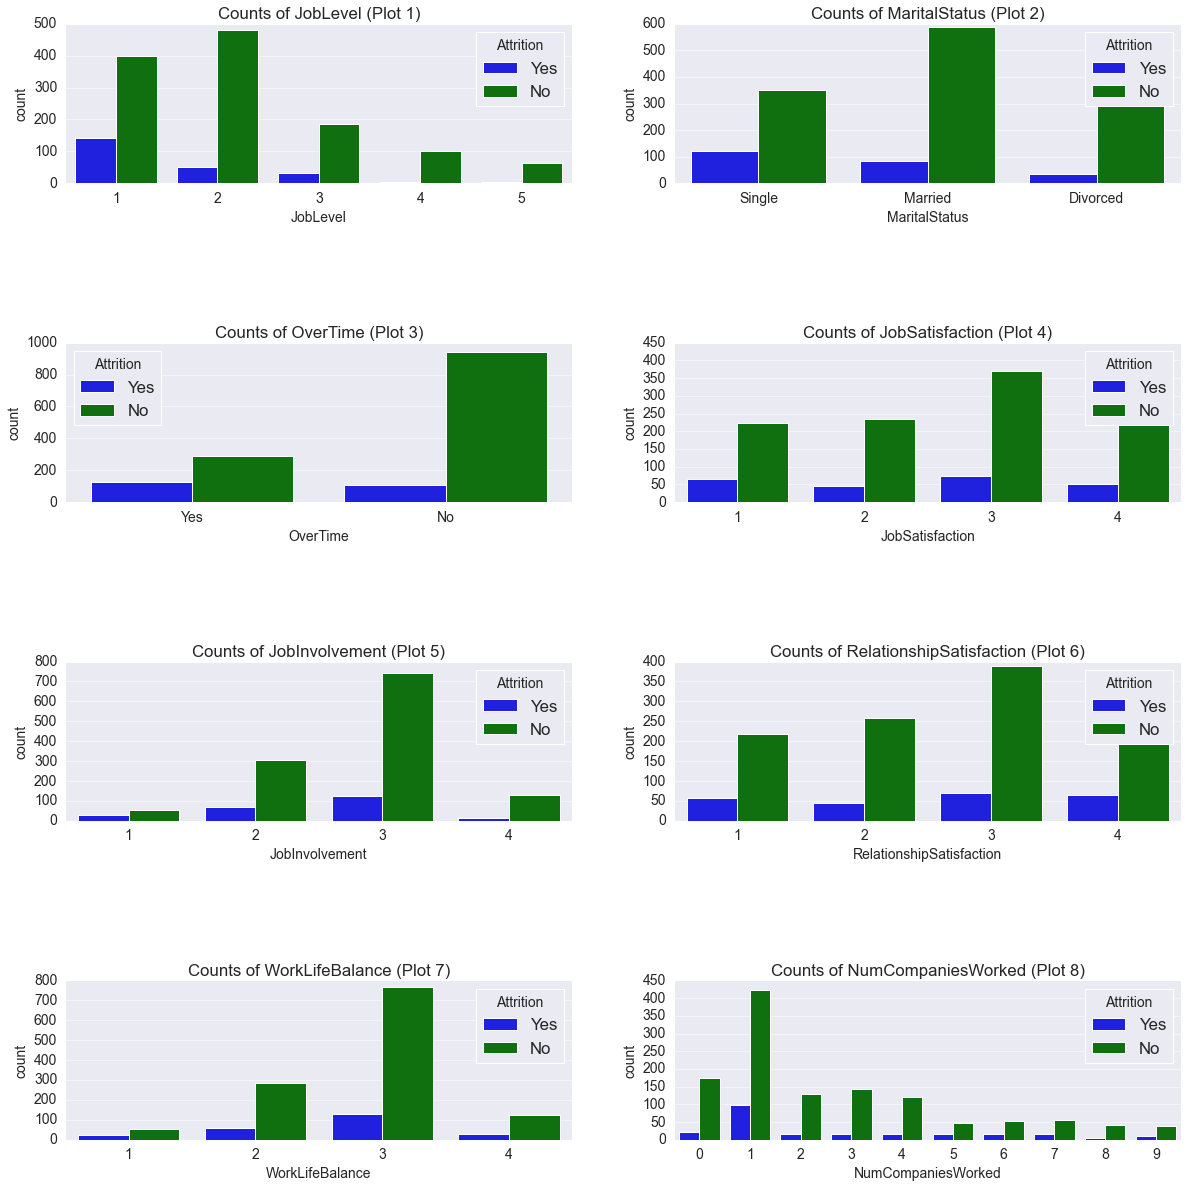

In [23]:
# This list of lists contains all the columns which have binary categorical values
colRange = [['JobLevel','MaritalStatus'], ['OverTime','JobSatisfaction'], ['JobInvolvement','RelationshipSatisfaction'], ['WorkLifeBalance','NumCompaniesWorked']]
# This function prints the countplots counting the number of employee that attrite based on the categories above
def printCount(cols):
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))
    plt.subplots_adjust(hspace=1.0)
    row=0
    col=0
    p_count=1
    for row in range(4):
        for col in range(2):
            # reads column name from the list
            column = colRange[row][col]
            # plots the counts of the particular column
            
            sns.countplot(ax=axes[row,col],x=df[column],hue=df['Attrition'])
            # sets the title of the corresponding plot along with plot number
            axes[row,col].set_title("Counts of {} (Plot {})".format(column,p_count))
            p_count += 1
# Calling the function
printCount(colRange)

Observation: 

Plot 1: Based on the result, it is evident that employees tend to leave at the early stage of the Job (Level 1) which may be influenced by various factors

Plot 2: Based of the graph, it shows that employees who are still single has a higher chance of attiring from the company

Plot 3: Based on the result, employees who worked Overtime passed their actual working hours has a higher chance of leaving the company

Plot 4: With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above, but raises where the people tend to coose better opportunities.

Plot5: Based on the plot, attrition tend to reduce but gradually increase which may be factored by working years or involvement

Plot 6: Based on the result, employees with less-time spent with their colleagues and managers tend to attrite from the company

Plot 7: Based on the result, employees who have poor work-life balance have adapted to their occupations, but those who have a better work-life balance score are more adjusted to the better life and are more likely to seek attrition. However, the attrition reduces when the work life balance is really good, and people are satisfied with the work they are doing

Plot 8: As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company

Text(0.5, 1.0, 'Rate of Attrition by Department')

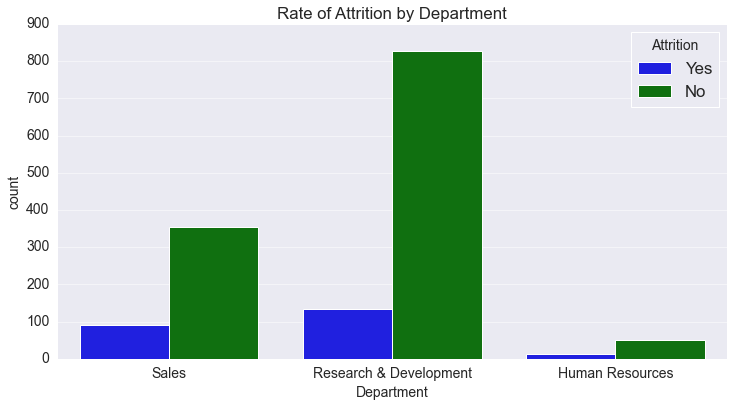

In [24]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# countplot plots the counts of each type of value in a particular column
# hue property is used to color code the counts according to a second categorical variable.
# plotting the graph
sns.countplot(df['Department'],hue=df['Attrition'])
plt.title('Rate of Attrition by Department')

Text(0.5, 1.0, 'Rate of Attrition by JobRole')

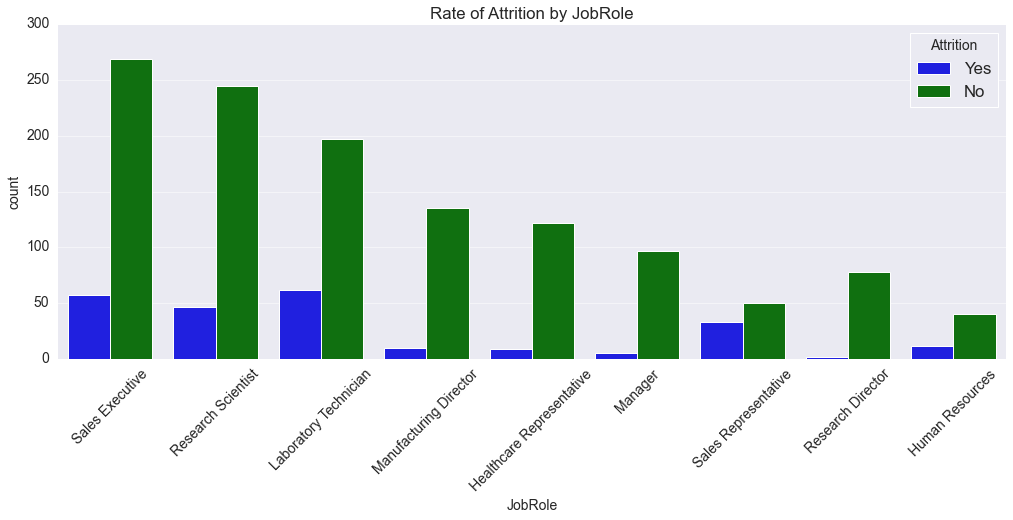

In [25]:
# This statement enlarges the image
plt.figure(figsize=(17,6))
plt.subplots_adjust(hspace=1.0)
# countplot plots the counts of each type of value in a particular column
# hue property is used to color code the counts according to a second categorical variable.
# plotting the graph
sns.countplot(df['JobRole'],hue=df['Attrition'])
plt.xticks(rotation=45)
plt.title('Rate of Attrition by JobRole')

Text(0.5, 1.0, 'Attrition Influence by TotalWorkingYears')

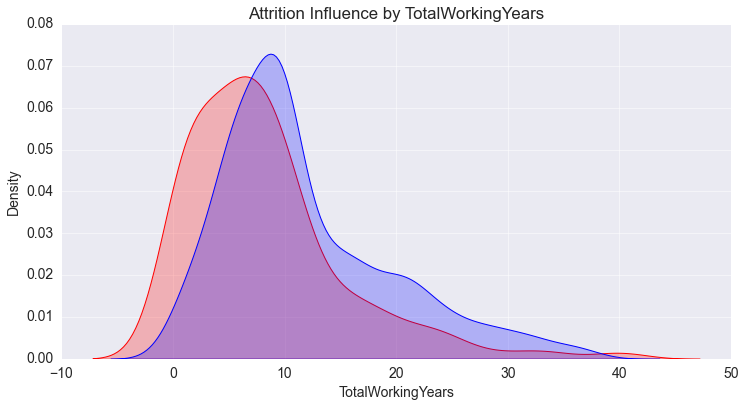

In [26]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting both graphs on top of each other
# kde plots 'kernel distribution estimate' of that particular column
sns.kdeplot(df[df['Attrition']=='Yes']['TotalWorkingYears'],shade=True,color='red')
sns.kdeplot(df[df['Attrition']=='No']['TotalWorkingYears'],shade=True,color='blue')
plt.title('Attrition Influence by TotalWorkingYears')

Text(0.5, 1.0, 'Attrition Influence by DailyRate')

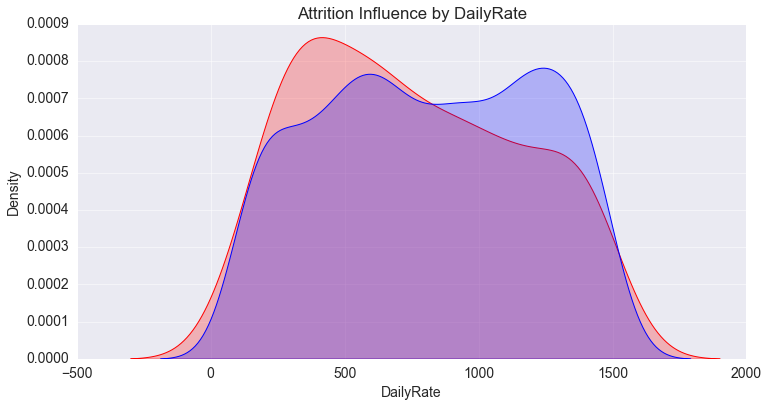

In [27]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting both graphs on top of each other
sns.kdeplot(df[df['Attrition']=='Yes']['DailyRate'],shade=True,color='red')
sns.kdeplot(df[df['Attrition']=='No']['DailyRate'],shade=True,color='blue')
plt.title('Attrition Influence by DailyRate')

Text(0.5, 1.0, 'Attrition Influence by Monthly Income')

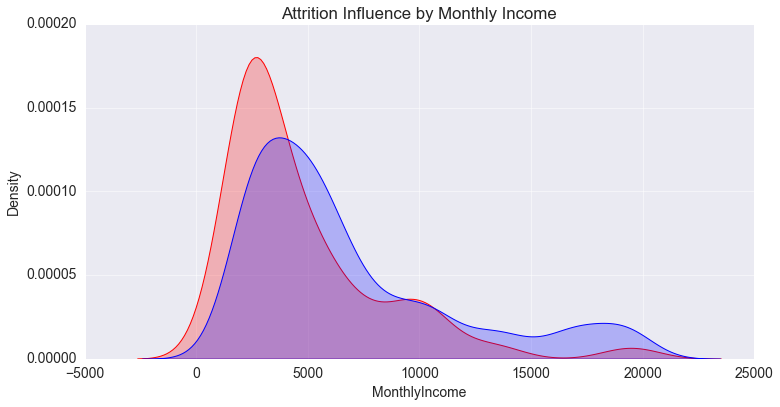

In [28]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting both graphs on top of each other
sns.kdeplot(df[df['Attrition']=='Yes']['MonthlyIncome'],shade=True,color='red')
sns.kdeplot(df[df['Attrition']=='No']['MonthlyIncome'],shade=True,color='blue')
plt.title('Attrition Influence by Monthly Income')

Text(0.5, 1.0, 'Attrition Influence by Years With Manager')

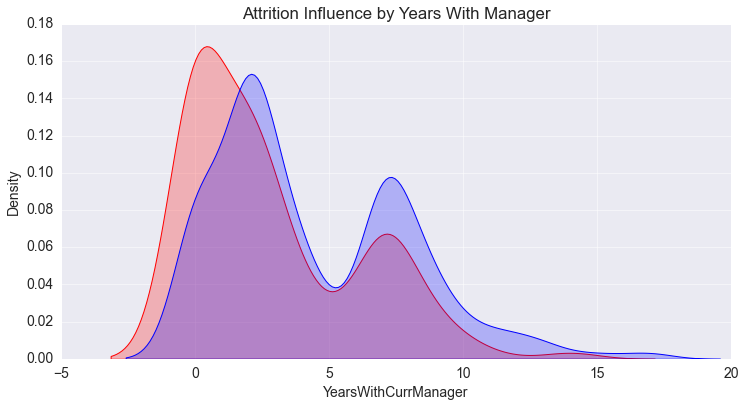

In [29]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting both graphs on top of each other
sns.kdeplot(df[df['Attrition']=='Yes']['YearsWithCurrManager'],shade=True,color='red')
sns.kdeplot(df[df['Attrition']=='No']['YearsWithCurrManager'],shade=True,color='blue')
plt.title('Attrition Influence by Years With Manager')

Text(0.5, 1.0, 'Attrition Influence by Percentage Salary Hike')

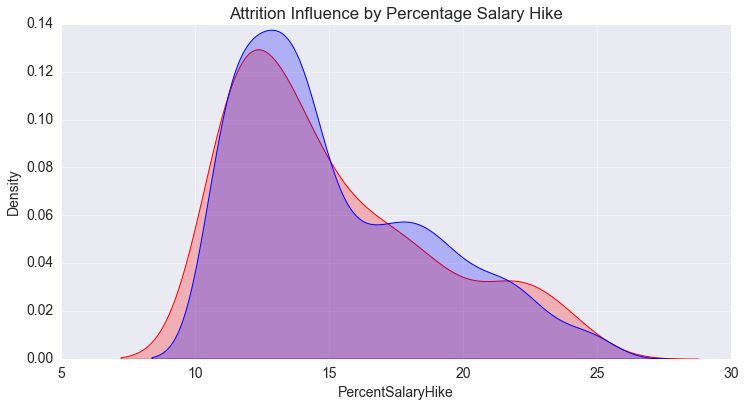

In [30]:
plt.figure(figsize=(12,6))
# plotting both graphs on top of each other
sns.kdeplot(df[df['Attrition']=='Yes']['PercentSalaryHike'],shade=True,color='red')
sns.kdeplot(df[df['Attrition']=='No']['PercentSalaryHike'],shade=True,color='blue')
plt.title('Attrition Influence by Percentage Salary Hike')

In [31]:
#To identify the categorical features and the unique values
for feature in df.select_dtypes(include = 'object').columns:
    print(feature)
    print (df[feature].unique())

Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department
['Sales' 'Research & Development' 'Human Resources']
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender
['Female' 'Male']
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus
['Single' 'Married' 'Divorced']
OverTime
['Yes' 'No']


In [32]:
#Changed the targeted variable from categorical vale to numerical value for correlation analysis
df.loc[df['Attrition']=='No','Attrition'] = 0
df.loc[df['Attrition']=='Yes','Attrition'] = 1
df.head(6)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41         1      Travel_Rarely       1102                   Sales   
1   49         0  Travel_Frequently        279  Research & Development   
2   37         1      Travel_Rarely       1373  Research & Development   
3   33         0  Travel_Frequently       1392  Research & Development   
4   27         0      Travel_Rarely        591  Research & Development   
5   32         0  Travel_Frequently       1005  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   
5                 2          2  Life Sciences                        4   

   Gender  ...  PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                 11                         1                 0   
1    Male  ...                 23                         4                 1   
2    Male  ...                 15                         2                 0   
3  Female  ...                 11                         3                 0   
4    Male  ...                 12                         4                 1   
5    Male  ...                 13                         3                 0   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   
5                 8                      2               2               7   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  
5                   7                        3                    6  

[6 rows x 30 columns]

In [33]:
#Displaying the corraltion table
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007707  ...   
DistanceFromHome          0.005303        -0.003669      -0.017014  ...   
Education                 0.101589        -0.011296       0.094961  ... 

<AxesSubplot:>

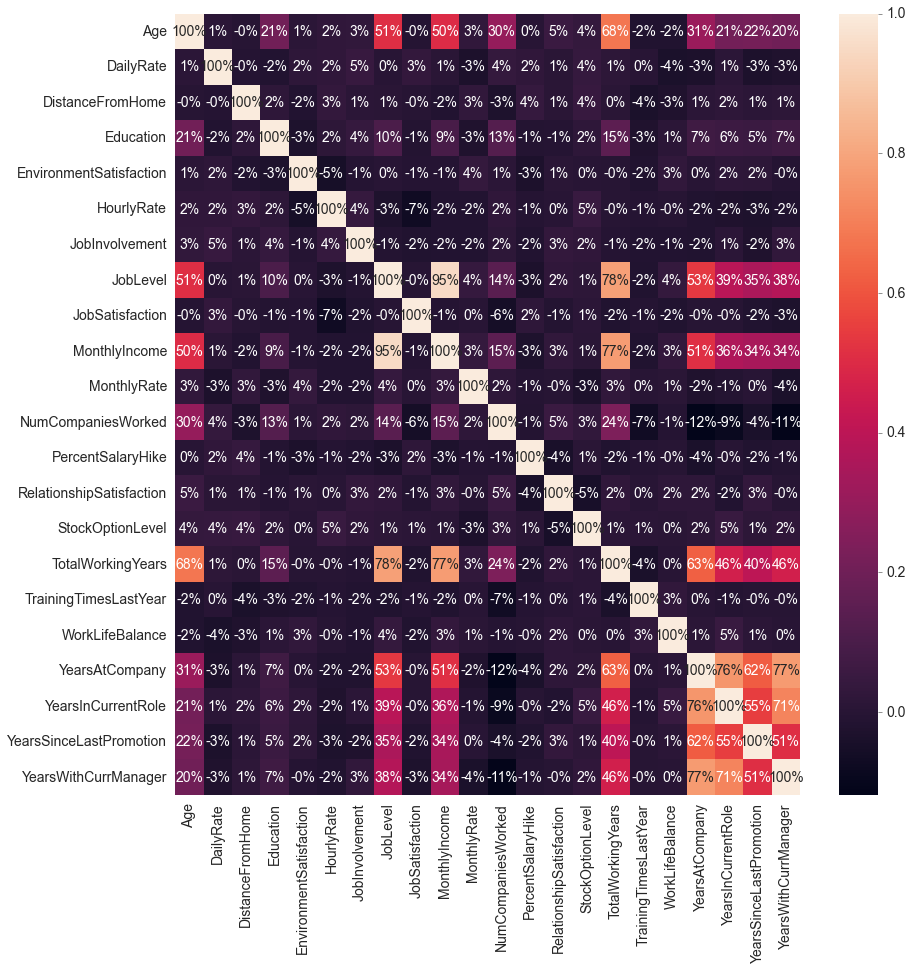

In [34]:
#Visualize the correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%' )

Observation:

The intesity of the purple fields represent NO or little correlation, while the relatively cream, orange and red fields colours represent an increase in correlation. The creame orange and red shows a positive or direct correlation (the variation of one characteristic directly affects the other) while the purple colour shows a negative or indirect correlation (the variation of a characteristic inversely affects that of the other).


By analysing the correlations in the heatmap we derive that the following characteristics have high correlations (i.e., between 1 and 95 for direct correlation and from −11 to −0 for inverse correlation):

A. Monthly Income increase and Job Level: Employees at high Job level has a 95% chance to receive Monthly salary increase

B. Years At Company and Years with Current manager: Employees who has spent a longer time has a 77% chance with good relationship with the manager

C: Number of Companies Worked and Years with current manager: Employees who has worked with a several companies has -11% chance with the current manager of the current company working with

# Data Transformation

In [35]:
#Transform Data
#Transform Non-numerical to Numerical columns
df_transformed = df.copy()
print("A copy of the dataset to transform")


A copy of the dataset to transform


In [36]:
#Encoding all Binary Categorical Columns
def transform_leb(x):
    le = LabelEncoder()
    Encoded_le = le.fit_transform(x)
    return Encoded_le

In [37]:
catagoral_labels = ["BusinessTravel","Department","Gender","EducationField","JobRole","MaritalStatus","Attrition","OverTime"]
for x in catagoral_labels:
    df_transformed[x] = transform_leb(df_transformed[x])

In [38]:
df_transformed.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0                 11                         1                 0   
1                 23                         4                 1   
2                 15                         2                 0   
3                 11                         3                 0   
4                 12                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 30 columns]

In [39]:
df_transformed.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [40]:
df_transformed.loc[df_transformed['OverTime']=='No','OverTime'] = 0
df_transformed.loc[df_transformed['OverTime']=='Yes','OverTime'] = 1
df_transformed.head(6)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   
5   32          0               1       1005           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   
5          2               1                        4       1  ...   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0                 11                         1                 0   
1                 23                         4                 1   
2                 15                         2                 0   
3                 11                         3                 0   
4                 12                         4                 1   
5                 13                         3                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   
5                  8                      2                2               7   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  
5                   7                        3                     6  

[6 rows x 30 columns]

In [41]:
#Checking that all categorical object type has been converyed to numerical data type 
df_transformed.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrM

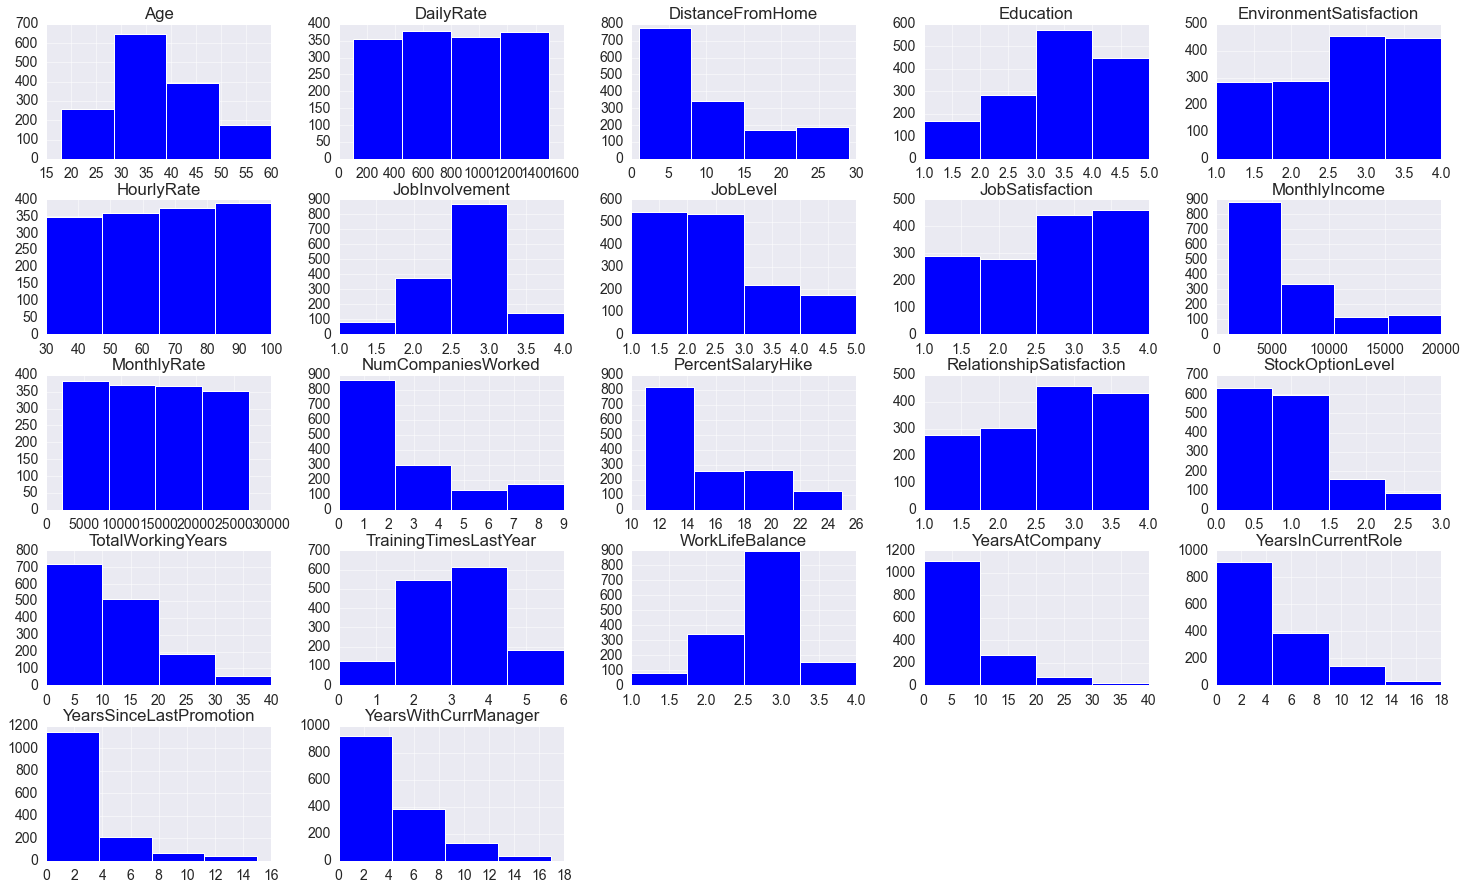

In [42]:
#Distribution of Continous Numerical Features
df.hist(bins=4, figsize=(25,15))

plt.show()

In [43]:
#Checking the targeted variable type and count
df_transformed['Attrition'].groupby(df_transformed['Attrition']).count()

Attrition
0    1233
1     237
Name: Attrition, dtype: int64

In [44]:
#To validate for Outliers
l = df_transformed.columns.values
len(l)

30

In [45]:
#Checking for Duplicates
duplicated_rows = df_transformed[df.duplicated()]
print(f'There are {duplicated_rows.shape[0]} duplicated rows in our data.')

There are 0 duplicated rows in our data.


# Test Train Split

In this section, the encoded dataset will be trained further and tested evaluated with various Supervised Machine Learning algorithm. The original data appears to be unbalanced , hence the aim of this research is to classify from existing data if an employee attrite from the company or not using these models to test its prediction accuracy.

First, the data will be split to Test and train.

In [46]:
#split data as training and testing set 70% and 30% respectively
train_x = df_transformed.drop(['Attrition'],axis=1)
train_y = df_transformed['Attrition']

X,test_x,Y,test_y = train_test_split(train_x, train_y, test_size=0.3,random_state=20)
len(test_x)

441

# Applying Supervised ML Algorithms

# Using Logistics Regression Models

In [47]:
clf = LogisticRegression()
clf.fit(np.array(X),Y)

LogisticRegression()

In [48]:
pred_y = clf.predict(test_x)

accuracy = accuracy_score(test_y, pred_y, normalize=True, sample_weight=None)
accuracy

0.8435374149659864

Observation: This results shows that Logistics model could be best used predicting the data but high accuracy does not guarantee good performance of the model

# Classification report for the unbalanced dataset

In [49]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.67      0.03      0.05        70

    accuracy                           0.84       441
   macro avg       0.76      0.51      0.48       441
weighted avg       0.82      0.84      0.78       441



Observation: Based of the classification report with the unbalanced data, the recall value returns a very low value of 3% with a low F1 score of 5% and has a good SUPPORT score of 70% which indicates that most of the minority class - YES will be miscategorized.

# Applying K-nearest neighbor model

In [50]:
kn = KNeighborsClassifier(n_neighbors = 15)
kn.fit(X, Y)
y_pred = kn.predict(test_x)
cmatrix = confusion_matrix(test_y, y_pred)
accuracy = accuracy_score(test_y, y_pred)
print("CM: ",cmatrix)
print("KNN Accuracy: ",accuracy)

CM:  [[371   0]
 [ 69   1]]
KNN Accuracy:  0.8435374149659864


# Applying Random Forest Algorithm

In [51]:
rforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rforest.fit(X, Y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [52]:
rforest.score(X, Y)

0.9854227405247813

In [53]:
Y_pred = rforest.predict(test_x)
cmatrix = confusion_matrix(test_y, Y_pred)
accuracy = accuracy_score(test_y, Y_pred)
print("CM: ",cmatrix)
print("Random Forest Classifier Accuracy: ",accuracy)

CM:  [[362   9]
 [ 61   9]]
Random Forest Classifier Accuracy:  0.8412698412698413


# Solving imbalance through Over-Sampling Techinque:

Random Oversampling entails supplementing the training data with multiple copies of some of the minority classes, employing the sampling technique - Random Over Sampler Technique, which generates synthetic samples by randomly sampling the characteristics from occurrences in the minority class.

The Over-Sampler tends to balance the encoded unbalanced data as the classification report generated with the unbalanced data was not a good model for prediction, hence the Random over sampling was rather employed than the Random under-sampling technique.

After which the supervised ML algorithms; Logistic regression, Random forest, K-nearest neighbour, Artificial neural network, ROC curve and Naïve Bayes Classifier will be used to test for the best and the accuracy prediction.

In [54]:
#To use the Over-sampling synthetic, the imblearn function has to be installed which is a method by which we can generate a data set that has an equal ratio of classes. 

In [55]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imblearn in c:\programdata\anaconda3\lib\site-packages (0.0)



You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [56]:
#Solving Imbalancing using Over-Sampling
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(sampling_strategy='all')
X_over, Y_over = sampler.fit_resample(X, Y)

In [57]:
#split data as training and testing set 70% and 30% respectively
X,test_x,Y,test_y = train_test_split(X_over, Y_over, test_size=0.3,random_state=0)
len(test_x)

518

In [58]:
X_over.shape , Y_over.shape

((1724, 29), (1724,))

# Data Standardization 

In [59]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test_x = scaler.transform(test_x)
X.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0 -0.315161        0.644125  -1.622426    1.279450          0.730179   
1 -0.315161       -2.426288  -0.001027   -0.561859         -0.708115   
2  1.255436       -0.891082  -1.012859   -0.561859         -0.708115   
3 -0.315161        0.644125  -0.775942   -0.561859          0.370605   
4  1.150730       -2.426288  -0.573576    1.279450         -0.947831   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0   0.108245       -0.235584                -1.423270 -1.202600    0.194997   
1   0.108245        1.927724                 1.221512  0.831531    1.212192   
2   2.116600        0.485518                 0.339918  0.831531    1.163755   
3  -1.900110       -0.956687                -0.541676 -1.202600   -0.580010   
4   1.112422       -0.235584                 0.339918  0.831531    1.066879   

   ...  PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0  ...          -0.041403                  0.275851         -0.825518   
1  ...          -0.041403                  1.179861          1.447483   
2  ...           2.763792                 -0.628160          0.310983   
3  ...           0.800155                 -1.532170         -0.825518   
4  ...          -1.163481                  1.179861          0.310983   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.555918               0.223214         0.363922       -0.546007   
1           0.073364              -0.573224        -0.934568        0.393343   
2           1.583640               0.223214         0.363922       -0.702566   
3          -0.681774               1.019651         0.363922       -0.546007   
4          -0.807631               0.223214        -2.233058       -0.859124   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0           -0.513442                -0.685256             -0.491536  
1            1.187687                -0.380305              0.959963  
2           -0.513442                -0.075353             -0.491536  
3           -0.513442                -0.685256             -0.491536  
4           -1.080485                -0.685256             -1.072135  

[5 rows x 29 columns]

# Logistic Regression Model

In [60]:
lg = LogisticRegression()
lg.fit(X, Y)
Y_pred = lg.predict(test_x)
cmatrix = confusion_matrix(test_y, Y_pred)
accuracy = accuracy_score(test_y, Y_pred)
print("CM: ",cmatrix)
print("Logistic Regression Classifier Accuracy: ",accuracy)

CM:  [[189  64]
 [ 60 205]]
Logistic Regression Classifier Accuracy:  0.7606177606177607


# Random Forest Model

In [61]:
rforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rforest.fit(X, Y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [62]:
rforest.score(X, Y)

1.0

In [63]:
Y_pred = rforest.predict(test_x)
cmatrix = confusion_matrix(test_y, Y_pred)
accuracy = accuracy_score(test_y, Y_pred)
print("CM: ",cmatrix)
print("Random Forest Classifier Accuracy: ",accuracy)

CM:  [[236  17]
 [  3 262]]
Random Forest Classifier Accuracy:  0.9613899613899614


# K-Nearest Neighbor Model

In [64]:
kn = KNeighborsClassifier(n_neighbors = 15)
kn.fit(X, Y)
Y_pred = kn.predict(test_x)
cmatrix = confusion_matrix(test_y, Y_pred)
accuracy = accuracy_score(test_y, Y_pred)
print("CM: ",cmatrix)
print("KNN Accuracy: ",accuracy)

CM:  [[190  63]
 [ 76 189]]
KNN Accuracy:  0.7316602316602316


# Classification report after Over-Sampling

In [65]:
print(classification_report(test_y, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       253
           1       0.75      0.71      0.73       265

    accuracy                           0.73       518
   macro avg       0.73      0.73      0.73       518
weighted avg       0.73      0.73      0.73       518



Observation: The result of the classification report tends to have been enhanced significantly when trained using the balanced classes. Therefore, the recall value was increased to 71% and the F1 score was increased to 73% while the SUPPORT was increased further. This simply means that the new balanced dataset is nonlinearly separable, and that using kernels to move data to higher dimensions aids in determining the optimal boundary. 

# ROC curve

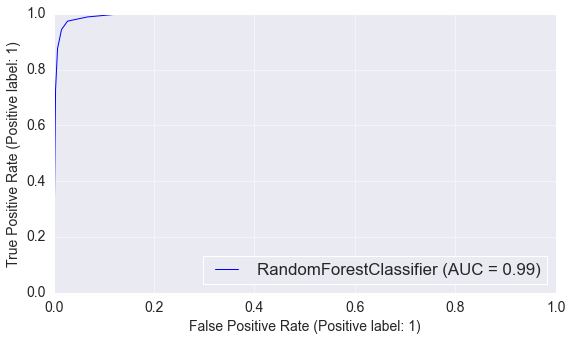

In [66]:
plot_roc_curve(rforest, test_x, test_y);

Observation: The ROC(AUC) curve was scaled with the random forest classifier as it has the highest accuracy after balancing the data, hence it can be used by HR managers for predicting attrition in the company

#  Solving imbalance through Under-Sampling:

In [67]:
#from imblearn.under_sampling import RandomUnderSampler
#sampler = RandomUnderSampler(random_state=20)
#X_under, Y_under = sampler.fit_resample(X, Y)

In [68]:
#X,test_x,Y,test_y = train_test_split(X_under, Y_under, test_size=0.3,random_state=0)
#len(test_x)

In [69]:
#X_under.shape , Y_under.shape

In [70]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#test_x = scaler.transform(test_x)

In [71]:
#print(classification_report(test_y, Y_pred))

In [72]:
#plot_roc_curve(rforest, test_x, test_y);

# Applying Artificial Neural Network

In [73]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [74]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [75]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [76]:
from keras.optimizers import Adam

In [77]:
train_x = df_transformed.drop(['Attrition'],axis=1)
train_y = df_transformed['Attrition']

X,test_x,Y,test_y = train_test_split(train_x, train_y, test_size=0.3,random_state=20)
len(test_x)

#X,test_x,Y,test_y = train_test_split(X, Y, test_size=0.3,random_state=20)
#len(test_x)

441

In [78]:
from keras.layers import Activation, Dense
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [79]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [80]:
# Train the model
model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

In [81]:
# Evaluate the model
_, accuracy = model.evaluate(test_x, test_y)
print("Accuracy: {:.2f}%".format(accuracy * 100))

14/14 [==============================] - 0s 693us/step - loss: 25.8562 - accuracy: 0.8413
Accuracy: 84.13%


# Applying Naive Bayes Classifier

In [82]:
from sklearn.datasets import load_iris

In [83]:
train_x = df_transformed.drop(['Attrition'],axis=1)
train_y = df_transformed['Attrition']

X,test_x,Y,test_y = train_test_split(train_x, train_y, test_size=0.3,random_state=30)
len(test_x)

441

In [84]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, Y)

GaussianNB()

In [85]:
Y_pred = gnb.predict(test_x)

In [86]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(test_y, Y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.7868480725623582


In [87]:
print(classification_report(test_y, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       372
           1       0.38      0.55      0.45        69

    accuracy                           0.79       441
   macro avg       0.64      0.69      0.66       441
weighted avg       0.83      0.79      0.80       441



# Based on the obtained results, it is inferred that Random Forest classifier proffered the highest accuracy being 96%, whereas the F1 score, and Recall was later enhanced after using the Oversampling technique to produce a good result

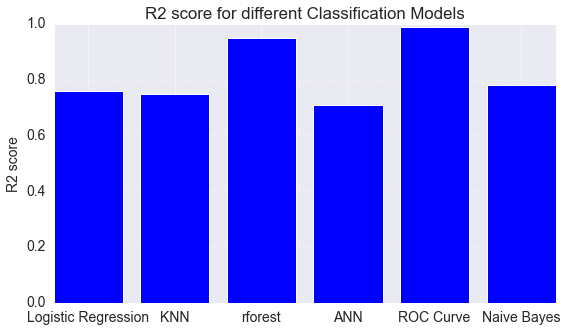

In [88]:
# R2 scores for each model
r2_scores = [0.76, 0.75, 0.95, 0.71, 0.99, 0.78]
# Model labels
model_labels = ['Logistic Regression', 'KNN', 'rforest', 'ANN', 'ROC Curve', 'Naive Bayes']
# Plot bar chart of R2 scores
plt.bar(model_labels, r2_scores)
# Set y-axis limits
plt.ylim([0, 1])
# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add axis labels and title
plt.ylabel('R2 score')
plt.title('R2 score for different Classification Models')
# Show plot
plt.show()